<a href="https://colab.research.google.com/github/Anyulund/NLP/blob/master/TwitterUSAirlineSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Description: Twitter US Airline Sentiment
## Data Description:
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from
February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").
### Dataset:
The project is from a dataset from Kaggle.
Link to the Kaggle project site: https://www.kaggle.com/crowdflower/twitter-airline-sentiment
The dataset has to be downloaded from the above Kaggle website.
The dataset has the following columns:
* tweet_id
* airline_sentiment
* airline_sentiment_confidence
* negativereason
* negativereason_confidence
* airline
* airline_sentiment_gold
* name
* negativereason_gold
* retweet_count
* text
* tweet_coord
* tweet_created
* tweet_location
* user_timezone
## Objective:
To implement the techniques learnt as a part of the course.
## Learning Outcomes:

Basic understanding of text pre-processing.
What to do after text pre-processing:
o Bag of words
o Tf-idf
Build the classification model.
Evaluate the Model.

## Steps and tasks:

1. Import the libraries, load dataset, print shape of data, data description. (5 Marks)
2. Understand of data-columns: 
  * Drop all other columns except “text” and “airline_sentiment”.
  *  Check the shape of data.
  * Print first 5 rows of data.
3. Text pre-processing: Data preparation. 
    * Html tag removal.
    * Tokenization.
    * Remove the numbers.
    * Removal of Special Characters and Punctuations.
    * Conversion to lowercase.
    * Lemmatize or stemming.
    * Join the words in the list to convert back to text string in the dataframe. (So that each row
contains the data in text format.)
    * Print first 5 rows of data after pre-processing.
4. Vectorization: 
    * Use CountVectorizer.
    * Use TfidfVectorizer.
5. Fit and evaluate model using both type of vectorization. 
6. Summarize your understanding of the application of Various Pre-processing and Vectorization and
performance of your model on this dataset. 
**Happy Learning!**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Import the libraries, load dataset, print shape of data, data description. (5 Marks)

In [ ]:
# Import necessary libraries.
import re, string, unicodedata
import pandas as pd
import nltk
import numpy as np           
                        # Natural language processing tool-kit
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

!pip install contractions
import contractions


from bs4 import BeautifulSoup                 # Beautiful soup is a parsing library that can use different parsers.
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet    # Stopwords, and wordnet corpus
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load dataset.
dataset = pd.read_csv('/content/drive/My Drive/PGP/Tweets.csv')
dataset.sample(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
11750,567779193342423040,negative,1.0,Customer Service Issue,0.6606,US Airways,NaN,DomaineD1997,NaN,0,@USAirways great job communicating to the pass...,NaN,2015-02-17 12:14:43 -0800,NC,NaN
8532,568186350219821057,neutral,1.0,NaN,NaN,Delta,NaN,shypoke1,NaN,0,@JetBlue need flight to ATH from PDX. Do you c...,NaN,2015-02-18 15:12:36 -0800,NaN,Pacific Time (US & Canada)
13458,569858012967542786,negative,1.0,Lost Luggage,0.3726,American,NaN,Jhosa_M,NaN,0,@AmericanAir Not even on the bag status...will...,NaN,2015-02-23 05:55:12 -0800,Ando por el mundo,Caracas
2138,569342670184648704,neutral,1.0,NaN,NaN,United,NaN,c4pyro,NaN,0,@united I see two flights with two seats in th...,NaN,2015-02-21 19:47:25 -0800,NaN,NaN
12729,570043390773084160,negative,1.0,Customer Service Issue,1.0000,American,NaN,blogblogblog,NaN,0,@AmericanAir customer service (if you can call...,NaN,2015-02-23 18:11:49 -0800,"Brevard, NC",Central Time (US & Canada)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

# 2. Understand of data-columns:
*  Drop all other columns except “text” and “airline_sentiment”. 
*  Check the shape of data. 
*  Print first 5 rows of data.

In [ ]:
dataset.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
df = dataset[['tweet_id','airline_sentiment','text']]

# First row of data.
pd.set_option('display.max_colwidth', None) # It will enable the entire row visible with truncation of the text. (We can see full text.)
df.loc[[10]]

,tweet_id,airline_sentiment,text
10,570294189143031808,neutral,@VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24


In [ ]:
df.shape

(14640, 3)

# 3. Text pre-processing: Data preparation. 
 * Html tag removal. 
 * Tokenization.
 * Remove the numbers.
 * Removal of Special Characters and Punctuations. 
 * Conversion to lowercase.
 * Lemmatize or stemming. 
 * Join the words in the list to convert back to text string in the dataframe(So that each row contains the data in text format.)
 
*  Print first 5 rows of data after pre-processing.


Regular expressions can be used to remove http links. Example is below. I will use Beautiful Soup to accomplish this task. 

 ```python
 # Removal of the http link using Regular Expression.
for i, row in data.iterrows():
    clean_text = re.sub(r"http\S+", "", data.at[i, 'text'])
    data.at[i,'text'] = clean_text
data.head()
```

Below function can be used for tokenization, special characters and numbers removal combined with GloVe embeddings since they support punctuation, numbers, accents and upper case characters.

I will modify this function to remove punctuation, numbers, accents and contractions since we are doing our own vectorizers and TF-IDF.

```python
def clean_str(string):
    """
    Tokenizes and cleans a string: contractions are broken off from their base words, punctuation is broken out
    into its own token, junk characters are removed, etc.
    :param string: the string to tokenize (one sentence, typicall)
    :return: a string with the same content as the input with whitespace where token boundaries should be, so split()
    will tokenize it.
    """
    string = re.sub(r"[^A-Za-z0-9(),.!?\'\`\-]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " ( ", string)
    string = re.sub(r"\)", " ) ", string)
    string = re.sub(r"\?", " ? ", string)
    string = re.sub(r"\-", " - ", string)
    # We may have introduced double spaces, so collapse these down
    string = re.sub(r"\s{2,}", " ", string)
    return string
```

In [ ]:
#Remove stop words first 
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist)) 



def remove_stopwords(string):
    """Remove stop words from list of tokenized words"""
    string = ' '.join(filter(lambda x: x.lower() not in stopwords,  string.split()))
    return string

In [ ]:
df['text'] = df['text'].apply(remove_stopwords)

In [ ]:
def clean_str(string):
    """
    Tokenizes and cleans a string: contractions are broken off from their base words, punctuation is broken out
    into its own token, junk characters are removed, etc.
    :param string: the string to tokenize (one sentence, typicall)
    :return: a string with the same content as the input with whitespace where token boundaries should be, so split()
    will tokenize it.
    """
    soup = BeautifulSoup(string,"html.parser")
    lemmatizer = WordNetLemmatizer()
    
    #string = soup.get_text()
    string = unicodedata.normalize('NFKD', string).encode('ascii', 'ignore').decode('utf-8', 'ignore') #remove accented characters
    string = contractions.fix(string) #remove contractions
    string = re.sub(r"[^A-Za-z0-9(),.!?\'\`\-]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r"[^\w\s]", " ", string) #remove punctuations
    string = re.sub(r"!", " ", string)
    string = re.sub(r"\(", " ", string)
    string = re.sub(r"\)", " ", string)
    string = re.sub(r"\?", " ", string)
    string = re.sub(r"\-", " ", string)
    string = re.sub(r"\d+", " ", string) #remove numbers
    # We may have introduced double spaces, so collapse these down
    string = re.sub(r"\s{2,}", " ", string)
    string = string.lower()
    string = lemmatizer.lemmatize(string, pos='v')
    return string

In [ ]:
df['text'] = df['text'].apply(clean_str)
df.head(5)

,tweet_id,airline_sentiment,text
0,570306133677760513,neutral,virginamerica dhepburn said
1,570301130888122368,positive,virginamerica plus added commercials experience tacky
2,570301083672813571,neutral,virginamerica did not today must mean need take another trip
3,570301031407624196,negative,virginamerica really aggressive blast obnoxious entertainment guests faces amp little recourse
4,570300817074462722,negative,virginamerica really big bad thing


# Vectorization: 
 * Use CountVectorizer. 
 * Use TfidfVectorizer.

In [ ]:
# Using Count Vectorizer to convert text data to numbers.

vectorizerCV = CountVectorizer(max_features=1000)                
data_features_CV = vectorizerCV.fit_transform(df['text'])

data_features_CV = data_features_CV.toarray()                        

data_features_CV.shape

(14640, 1000)

In [ ]:
# Using TfidfVectorizer to convert text data to numbers.

vectorizerTFIDF = TfidfVectorizer(max_features=1000)
data_features_TFIDF = vectorizerTFIDF.fit_transform(df['text'])

data_features_TFIDF = data_features_TFIDF.toarray()

data_features_TFIDF.shape

(14640, 1000)

# Fit and evaluate model using both type of vectorization. 

In [ ]:
ord_enc = OrdinalEncoder()
df["labels"] = ord_enc.fit_transform(df[["airline_sentiment"]])

labels = df["labels"]
labels = labels.astype('int')
df[["labels", "airline_sentiment"]].head(5)

,labels,airline_sentiment
0,1.0,neutral
1,2.0,positive
2,1.0,neutral
3,0.0,negative
4,0.0,negative


In [ ]:
# Split data into training and testing set.

X_trainCV, X_testCV, y_trainCV, y_testCV = train_test_split(data_features_CV, labels, test_size=0.3, random_state=42)

X_trainTFIDF, X_testTFIDF, y_trainTFIDF, y_testTFIDF = train_test_split(data_features_TFIDF, labels, test_size=0.3, random_state=42)

In [ ]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forestCV = forest.fit(X_trainCV, y_trainCV)

forestTFIDF = forest.fit(X_trainTFIDF, y_trainTFIDF)

print(forest)

print("Count Vectorizer",np.mean(cross_val_score(forestCV, data_features_CV, labels, cv=10)))
print("TFIDF",np.mean(cross_val_score(forestTFIDF, data_features_TFIDF, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
Count Vectorizer 0.700136612021858
TFIDF 0.703688524590164


In [ ]:
resultCV = forestCV.predict(X_testCV)
resultTFIDF = forestTFIDF.predict(X_testTFIDF)

conf_matCV = confusion_matrix(y_testCV, resultCV)
conf_matTFIDF = confusion_matrix(y_testTFIDF, resultTFIDF)

df_cmCV = pd.DataFrame(conf_matCV, index = [i for i in "012"],
                  columns = [i for i in "012"])
df_cmTFIDF = pd.DataFrame(conf_matTFIDF, index = [i for i in "012"],
                  columns = [i for i in "012"])

print(conf_matCV)

[[1856  771  187]
 [ 278  528   78]
 [ 124  217  353]]


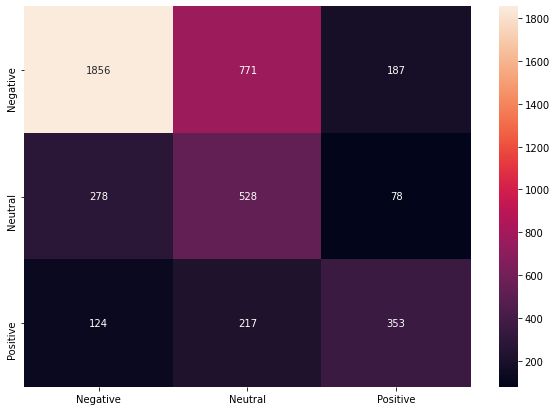

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(df_cmCV, annot=True, fmt='g', xticklabels=["Negative","Neutral","Positive"], yticklabels=["Negative","Neutral","Positive"])

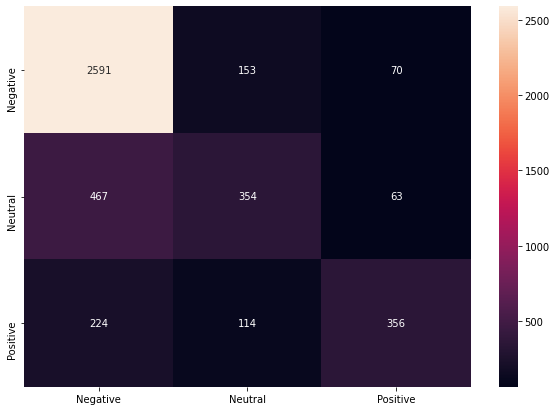

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(df_cmTFIDF, annot=True, fmt='g',xticklabels=["Negative","Neutral","Positive"], yticklabels=["Negative","Neutral","Positive"])

# Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset. 


- We used dataset which has reviews in text format and their sentiment score on the scale of 1 to 3: negative, neutral and positive.
- TFIDF vectorization performed better than Counter Vectorizer
- Text preprocessing depends on the methods used. For example punctuation can be included and different stop words can be used


